In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval as make_tuple

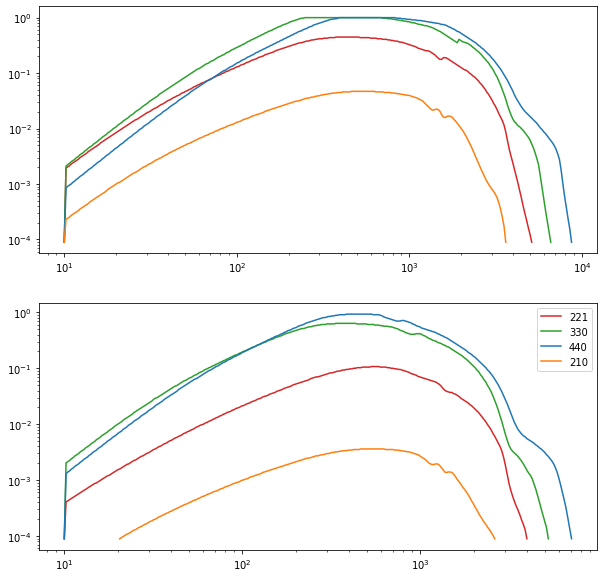

In [2]:
df_ray = pd.read_csv('../data/two_modes_horizons_critical.dat', sep='\t')
df_ray['modes'] = df_ray.apply(lambda row: make_tuple(row.modes)[1][1]+make_tuple(row.modes)[1][3]+make_tuple(row.modes)[1][5], axis=1)
df_ray = df_ray[df_ray.detector == 'LIGO']
fig, ax = plt.subplots(2, figsize = [10,10])
i = 0
colors = {
    '221': 'tab:red',
    '330': 'tab:green',
    '440': 'tab:blue',
    '210': 'tab:orange',
}
for q in df_ray.mass_ratio.unique():
    df_q = df_ray[df_ray.mass_ratio == q]
    for mode in df_ray.modes.unique():
        df_plot = df_q[df_q.modes == mode]
        ax[i].loglog(df_plot.masses, df_plot.redshifts, label = mode, color = colors[mode])
    i += 1
plt.legend()


In [3]:
def import_data_bayes(mass_ratio, mode):
    """Import data computed from scr/rayleigh_criterion_two_modes.py
    
    Parameters
    ----------
    detector : str
        Gravitational wave detector name. Must be {'LIGO', 'LISA',
        'CE' = 'CE2silicon', 'CE2silica', 'ET'}.
    mass_ratio : TYPE
        Binary black hole mass ratio. mass_ratio >= 1. This is used to
        determine the QNM parameters.
    
    Returns
    -------
    Pandas DataFrame
        Return DataFrame with the data
    """
    columns = ('mass',
               'redshift',
              )

    df = pd.read_csv(f'../data/bayes/horizon_{mass_ratio}_data_220_{mode}_model_220.dat', delimiter = "\t", comment="#", names=columns)
    df['modes'] = [mode]*len(df.mass)
    df['mass_ratio'] = [mass_ratio]*len(df.mass)
    return df

In [4]:
bayes = pd.DataFrame()
for q in [1.5, 10]:
    for mode in ['221', '330', '440', '210']:
        bayes = bayes.append(import_data_bayes(q, mode))


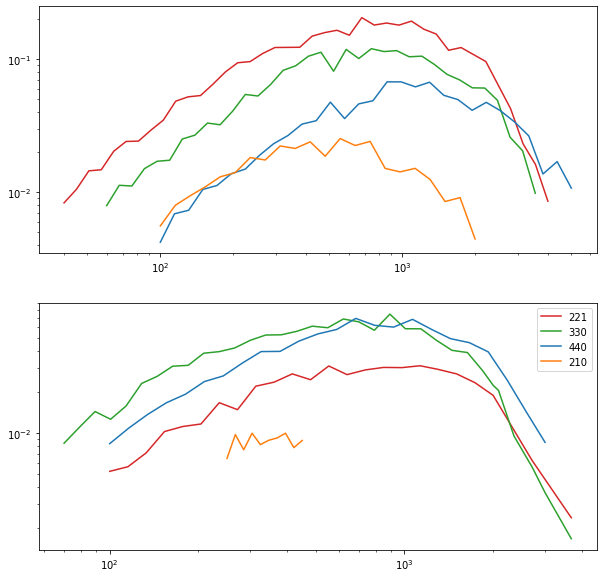

In [5]:
fig, ax = plt.subplots(2, figsize = [10,10])
i = 0
for q in bayes.mass_ratio.unique():
    df_q = bayes[bayes.mass_ratio == q]
    for mode in bayes.modes.unique():
        df_plot = df_q[df_q.modes == mode]
        df_plot = df_plot.sort_values(by=['mass'])
        ax[i].loglog(df_plot.mass, df_plot.redshift, label = mode, color = colors[mode])
    i += 1
plt.legend()

1.5
221
0.4594437118009054 

330
0.1198542121681573 

440
0.0675391030924246 

210
0.540236181582606 


10.0
221
0.28972192617792997 

330
0.11714557441071645 

440
0.07457112524935021 

210
2.7602961122550536 




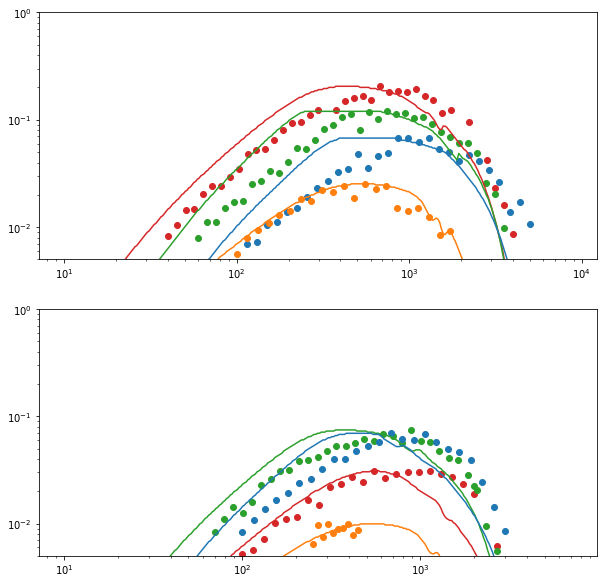

In [9]:
fig, ax = plt.subplots(2, figsize = [10,10])
i = 0
for q in df_ray.mass_ratio.unique():
    df_q_ray = df_ray[df_ray.mass_ratio == q]
    df_q_bayes = bayes[bayes.mass_ratio == q]
    print(q)
    for mode in df_ray.modes.unique():
        df_plot_ray = df_q_ray[df_q_ray.modes == mode]
        df_plot_bayes = df_q_bayes[df_q_bayes.modes == mode]
        max_ray = df_plot_ray.redshifts.max()
        max_bayes = df_plot_bayes.redshift.max()
        print(mode)
        print((max_bayes/max_ray), '\n')
        ax[i].scatter(df_plot_bayes.mass, df_plot_bayes.redshift, label = mode, color = colors[mode])
        ax[i].loglog(df_plot_ray.masses, df_plot_ray.redshifts*max_bayes/max_ray, label = mode, color = colors[mode])
    ax[i].set_ylim(5e-3, 1)
    print('')
        
    i += 1